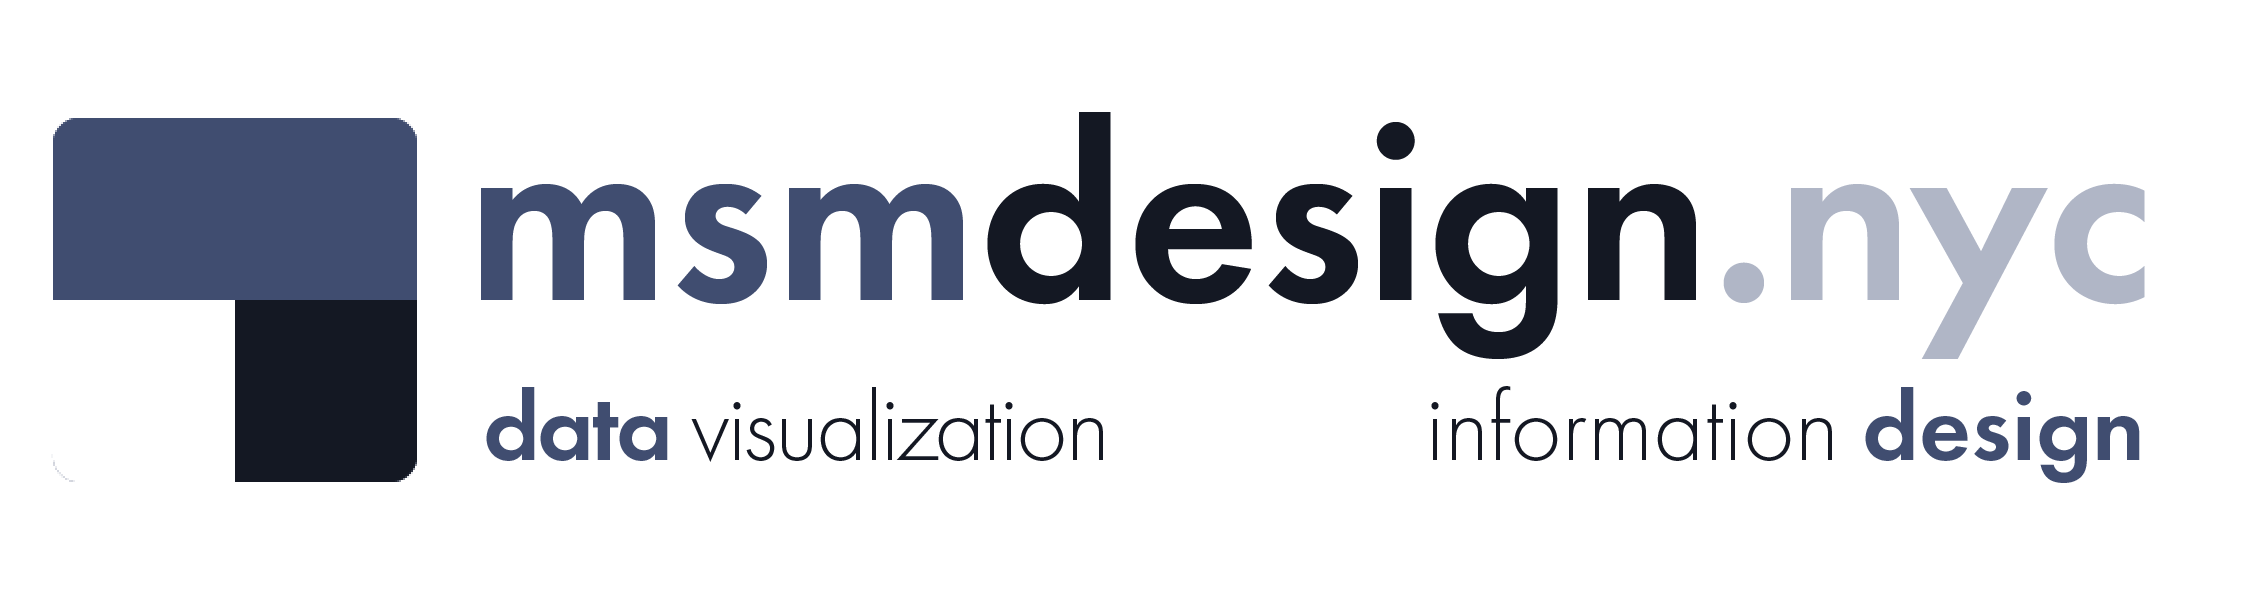

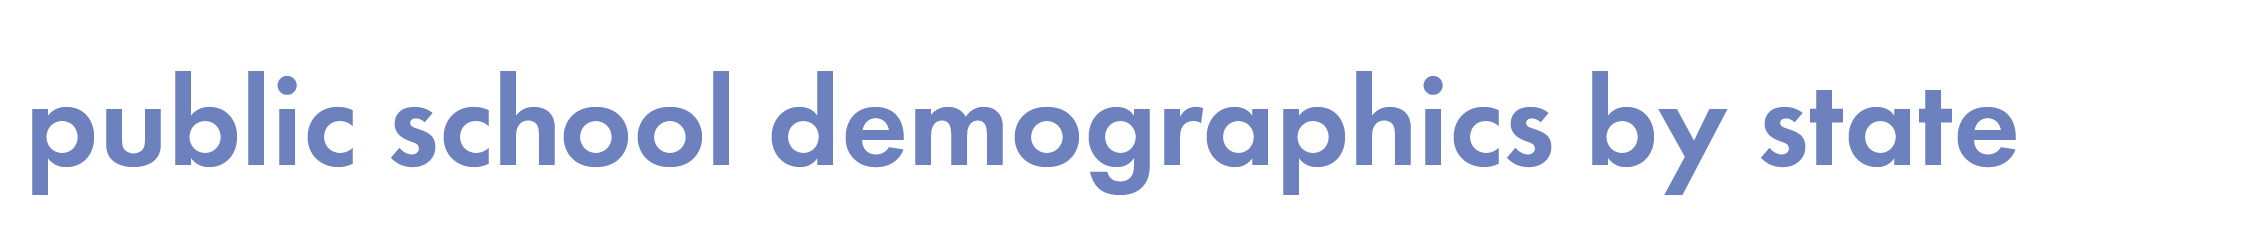

**Catalogue Number:** MSM-E23

**Author:** David White

**Contact:** david@msmdesign.nyc | [msmdesign.nyc](https://msmdesign.nyc/)

**Acknowledgements:** NYC Open Data [https://opendata.cityofnewyork.us/]

**Language:** Python

**Libraries Used:** NumPy, pandas, matplotlib, seaborn 

> ### What is Exploratory Data Analysis?
> **Exploratory data analysis (EDA)** is a technique used by data scientists to inspect, characterize and briefly summarize the contents of a dataset. EDA is often the first step when encountering a new or unfamiliar dataset. EDA helps the data scientist become acquainted with a dataset and test some basic assumptions about the data. By the end of the EDA process, some initial insights can be drawn from the dataset and a framework for further analysis or modeling is established.


## 0. About this Dataset

**Data Source: U.S. Department of Education National Center for Education Statistics Common Core of Data (CCD)** 

"Public Elementary/Secondary School Universe Survey" 2018-19 v.1a; "Public Elementary/Secondary School Universe Survey Geographic Data (EDGE)" 2018-19 v.1a. Data provided by the National Center for Education Statistics - [http://nces.ed.gov/ccd/elsi/]

## 1. Prepare the Workspace

In [1]:
# import the libraries needed for data analysis and visualization

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# import the dataset from GitHub

data = pd.read_csv("https://raw.githubusercontent.com/davidwhitemsm/selected-open-datasources/master/MSM-DS26-ELSI_csv_export_Table%20ID%20140972.csv")

In [20]:
# confirm that the data has loaded by taking a glimpse at the first five rows of the dataset

data.head(5)

,State Name,Total Number Operational Charter Schools [Public School] 2018-19,Total Number of Public Schools [Public School] 2018-19,Total Students All Grades (Includes AE) [Public School] 2018-19,Free and Reduced Lunch Students [Public School] 2018-19,Total Race/Ethnicity [Public School] 2018-19,Pupil/Teacher Ratio [State] 2018-19,Full-Time Equivalent (FTE) Teachers [State] 2018-19,Instructional Aides [State] 2018-19,Guidance Counselors [State] 2018-19,...,Two or More Races Students [Public School] 2018-19,Male Students [State] 2018-19,Female Students [State] 2018-19,American Indian/Alaska Native Students [State] 2018-19,Asian or Asian/Pacific Islander Students [State] 2018-19,Hispanic Students [State] 2018-19,Black Students [State] 2018-19,White Students [State] 2018-19,Hawaiian Nat./Pacific Isl. Students [State] 2018-19,Two or More Races Students [State] 2018-19
0,ALABAMA,2,1529,739304,407040,738495,17.56,42113.64,6508.89,1769.44,...,17674,379760,359956,6918,10887,62089,240190,401066,881,17685
1,ALASKA,28,510,130963,45537,130963,17.10,7656.78,2720.43,313.74,...,15041,67626,63337,29839,7599,8750,3572,62159,4003,15041
2,ARIZONA,558,2434,1136253,†,1135883,23.53,48510.41,16383.78,1261.63,...,37612,584228,556973,51012,33646,520742,62570,431056,4425,37750
3,ARKANSAS,85,1080,491804,314759,490772,13.03,38019.16,9270.08,1346.17,...,13498,253924,241367,3086,8136,65392,100026,300475,4304,13872
4,CALIFORNIA,1358,10437,6171666,3667601,6163584,23.08,271805.20,87747.71,10254.16,...,275017,3178223,3008055,31358,723605,3374921,334652,1417055,28085,276602


## 2. Describe the Characteristics of the Dataset

In [8]:
# determine the number of rows and columns in the dataset

data.shape

(51, 42)

**TAKEAWAY:** The dataset consists of 51 rows and 42 columns.

In [10]:
# list each of the columns contained in the dataset 

data.columns

Index(['State Name',
       'Total Number Operational Charter Schools [Public School] 2018-19',
       'Total Number of Public Schools [Public School] 2018-19',
       'Total Students All Grades (Includes AE) [Public School] 2018-19',
       'Free and Reduced Lunch Students [Public School] 2018-19',
       'Total Race/Ethnicity [Public School] 2018-19',
       'Pupil/Teacher Ratio [State] 2018-19',
       'Full-Time Equivalent (FTE) Teachers [State] 2018-19',
       'Instructional Aides [State] 2018-19',
       'Guidance Counselors [State] 2018-19', 'Librarians [State] 2018-19',
       'Library Support Staff [State] 2018-19',
       'LEA Administrators [State] 2018-19',
       'LEA Administrative Support Staff [State] 2018-19',
       'School Administrators [State] 2018-19',
       'All Other Support Staff [State] 2018-19',
       'Student Support Services [State] 2018-19',
       'Full-Time Equivalent (FTE) Staff [State] 2018-19',
       'Instructional Coordinators [State] 2018-19',
 

**TAKEAWAY:** The dataset consists of:
- student enrollment
- school staffing
- student demographic information

In [12]:
# list the datatype of each variable contained in the dataset and check to see which variables have missing data

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 42 columns):
State Name                                                          51 non-null object
Total Number Operational Charter Schools [Public School] 2018-19    51 non-null object
Total Number of Public Schools [Public School] 2018-19              51 non-null int64
Total Students All Grades (Includes AE) [Public School] 2018-19     51 non-null int64
Free and Reduced Lunch Students [Public School] 2018-19             51 non-null object
Total Race/Ethnicity [Public School] 2018-19                        51 non-null int64
Pupil/Teacher Ratio [State] 2018-19                                 51 non-null float64
Full-Time Equivalent (FTE) Teachers [State] 2018-19                 51 non-null float64
Instructional Aides [State] 2018-19                                 51 non-null object
Guidance Counselors [State] 2018-19                                 51 non-null float64
Librarians [State] 2018-19 

**TAKEAWAY:** There are 51 rows and 42 columns in the dataset. None of the rows are blank.

In [16]:
# the data set seems to have one row of data per U.S. State. 
# let's test this assumption by checking for unique values in the 'State' column.

print(data['State Name'].unique())

['ALABAMA' 'ALASKA' 'ARIZONA' 'ARKANSAS' 'CALIFORNIA' 'COLORADO'
 'CONNECTICUT' 'DELAWARE' 'DISTRICT OF COLUMBIA' 'FLORIDA' 'GEORGIA'
 'HAWAII' 'IDAHO' 'ILLINOIS' 'INDIANA' 'IOWA' 'KANSAS' 'KENTUCKY'
 'LOUISIANA' 'MAINE' 'MARYLAND' 'MASSACHUSETTS' 'MICHIGAN' 'MINNESOTA'
 'MISSISSIPPI' 'MISSOURI' 'MONTANA' 'NEBRASKA' 'NEVADA' 'NEW HAMPSHIRE'
 'NEW JERSEY' 'NEW MEXICO' 'NEW YORK' 'NORTH CAROLINA' 'NORTH DAKOTA'
 'OHIO' 'OKLAHOMA' 'OREGON' 'PENNSYLVANIA' 'RHODE ISLAND' 'SOUTH CAROLINA'
 'SOUTH DAKOTA' 'TENNESSEE' 'TEXAS' 'UTAH' 'VERMONT' 'VIRGINIA'
 'WASHINGTON' 'WEST VIRGINIA' 'WISCONSIN' 'WYOMING']


**TAKEAWAY:** The dataset contains one row for each US state plus the District of Columbia.

## 3. Summarize the Dataset

In [41]:
# create a subset of columns containing demographic subgroup information and glipse

subgroups = pd.read_csv("https://raw.githubusercontent.com/davidwhitemsm/selected-open-datasources/master/MSM-DS26-ELSI_csv_export_Table%20ID%20140972.csv", 
                 usecols=['State Name','Male Students [Public School] 2018-19',
       'Female Students [Public School] 2018-19',
       'American Indian/Alaska Native Students [Public School] 2018-19',
       'Asian or Asian/Pacific Islander Students [Public School] 2018-19',
       'Hispanic Students [Public School] 2018-19',
       'Black Students [Public School] 2018-19',
       'White Students [Public School] 2018-19',
       'Hawaiian Nat./Pacific Isl. Students [Public School] 2018-19','Two or More Races Students [Public School] 2018-19'])
subgroups.head()

,State Name,Male Students [Public School] 2018-19,Female Students [Public School] 2018-19,American Indian/Alaska Native Students [Public School] 2018-19,Asian or Asian/Pacific Islander Students [Public School] 2018-19,Hispanic Students [Public School] 2018-19,Black Students [Public School] 2018-19,White Students [Public School] 2018-19,Hawaiian Nat./Pacific Isl. Students [Public School] 2018-19,Two or More Races Students [Public School] 2018-19
0,ALABAMA,379125,359370,6916,10860,62038,239759,400367,881,17674
1,ALASKA,67626,63337,29839,7599,8750,3572,62159,4003,15041
2,ARIZONA,581012,554871,50877,33428,518080,62005,429470,4411,37612
3,ARKANSAS,252133,239671,2771,7750,64790,99667,298173,4123,13498
4,CALIFORNIA,3167866,3003800,28381,721827,3368944,331252,1412439,25724,275017


**TAKEAWAY:** The dataset contains totals per state of the number of students in (2) gender categories and (7) race/ethnicity categories.

In [32]:
# summary statistics on the dataset

subgroups.describe()

,Male Students [Public School] 2018-19,Female Students [Public School] 2018-19,American Indian/Alaska Native Students [Public School] 2018-19,Asian or Asian/Pacific Islander Students [Public School] 2018-19,Hispanic Students [Public School] 2018-19,Black Students [Public School] 2018-19,White Students [Public School] 2018-19,Hawaiian Nat./Pacific Isl. Students [Public School] 2018-19,Two or More Races Students [Public School] 2018-19
count,5.100000e+01,5.100000e+01,51.000000,51.000000,5.100000e+01,51.000000,5.100000e+01,51.000000,51.000000
mean,5.067872e+05,4.802107e+05,9266.470588,51948.647059,2.678522e+05,149220.372549,4.645937e+05,3442.078431,39857.980392
std,6.029885e+05,5.722634e+05,15524.656776,109441.469833,6.122845e+05,176718.990591,3.720976e+05,7966.708748,44985.124083
min,4.352000e+04,4.013100e+04,81.000000,784.000000,1.984000e+03,1026.000000,1.041600e+04,45.000000,2166.000000
25%,1.489505e+05,1.399745e+05,1321.000000,5657.500000,3.235800e+04,11702.000000,1.568200e+05,315.000000,10309.500000
50%,3.588130e+05,3.399870e+05,3536.000000,18202.000000,1.019080e+05,64606.000000,3.808300e+05,1006.000000,29043.000000
75%,5.806480e+05,5.494835e+05,8757.000000,56638.000000,2.074140e+05,253845.500000,6.233425e+05,2287.500000,56602.500000
max,3.167866e+06,3.003800e+06,91839.000000,721827.000000,3.368944e+06,686252.000000,1.490748e+06,50431.000000,275017.000000


In [40]:
subgroups.sum()

State Name                                                          ALABAMAALASKAARIZONAARKANSASCALIFORNIACOLORADO...
Male Students [Public School] 2018-19                                                                        25846148
Female Students [Public School] 2018-19                                                                      24490747
American Indian/Alaska Native Students [Public School] 2018-19                                                 472590
Asian or Asian/Pacific Islander Students [Public School] 2018-19                                              2649381
Hispanic Students [Public School] 2018-19                                                                    13660463
Black Students [Public School] 2018-19                                                                        7610239
White Students [Public School] 2018-19                                                                       23694279
Hawaiian Nat./Pacific Isl. Students [Public School] 2018

**TAKEAWAY:** 2018-19 US public school total enrollments by demographic group are as follows:
- 25.8 million male students
- 24.4 million female students
- 473K American Indian/Alaska Native students
- 2.6 million Asian or Asian/Pacific Islander students
- 13.7 million Hispanic students
- 7.6 million Black students
- 23.7 million White students
- 176K Hawaiian Nat./Pacific Isl. students
- 2 million multiracial students

In [38]:
# here is the same information presented in a pivot table format

states = subgroups.T
states

,0,1,2,3,4,5,6,7,8,9,...,41,42,43,44,45,46,47,48,49,50
State Name,ALABAMA,ALASKA,ARIZONA,ARKANSAS,CALIFORNIA,COLORADO,CONNECTICUT,DELAWARE,DISTRICT OF COLUMBIA,FLORIDA,...,SOUTH DAKOTA,TENNESSEE,TEXAS,UTAH,VERMONT,VIRGINIA,WASHINGTON,WEST VIRGINIA,WISCONSIN,WYOMING
Male Students [Public School] 2018-19,379125,67626,581012,252133,3167866,468238,263177,70864,44456,1462206,...,71106,516533,2785567,348212,43520,664584,580284,138717,442788,48786
Female Students [Public School] 2018-19,359370,63337,554871,239671,3003800,443103,251521,67541,43270,1384223,...,67338,489776,2647904,328219,40131,624783,544096,129259,416521,45527
American Indian/Alaska Native Students [Public School] 2018-19,6916,29839,50877,2771,28381,5961,988,540,81,8126,...,14915,1167,20426,7124,221,3408,12916,130,8918,3442
Asian or Asian/Pacific Islander Students [Public School] 2018-19,10860,7599,33428,7750,721827,28743,26862,5571,1308,78933,...,2416,19748,242688,11584,1886,92045,88586,1654,34298,784
Hispanic Students [Public School] 2018-19,62038,8750,518080,64790,3368944,305857,131082,24473,14389,964117,...,8959,109112,2855160,117550,1984,208432,265990,4931,105749,13050
Black Students [Public School] 2018-19,239759,3572,62005,99667,331252,40847,64606,41709,59064,624312,...,4488,219853,686252,9498,2014,285841,50069,11108,77772,1026
White Students [Public School] 2018-19,400367,62159,429470,298173,1412439,486534,271805,60267,10416,1063746,...,101113,622666,1490748,500790,74934,624019,598979,240394,595077,73237
Hawaiian Nat./Pacific Isl. Students [Public School] 2018-19,881,4003,4411,4123,25724,2002,303,116,45,4839,...,146,740,8271,10742,83,2135,12347,48,311,154
Two or More Races Students [Public School] 2018-19,17674,15041,37612,13498,275017,39660,18276,5597,2166,102356,...,6407,31519,129926,19143,2267,73487,93836,9008,35033,2620


## 4. Visualize the Dataset

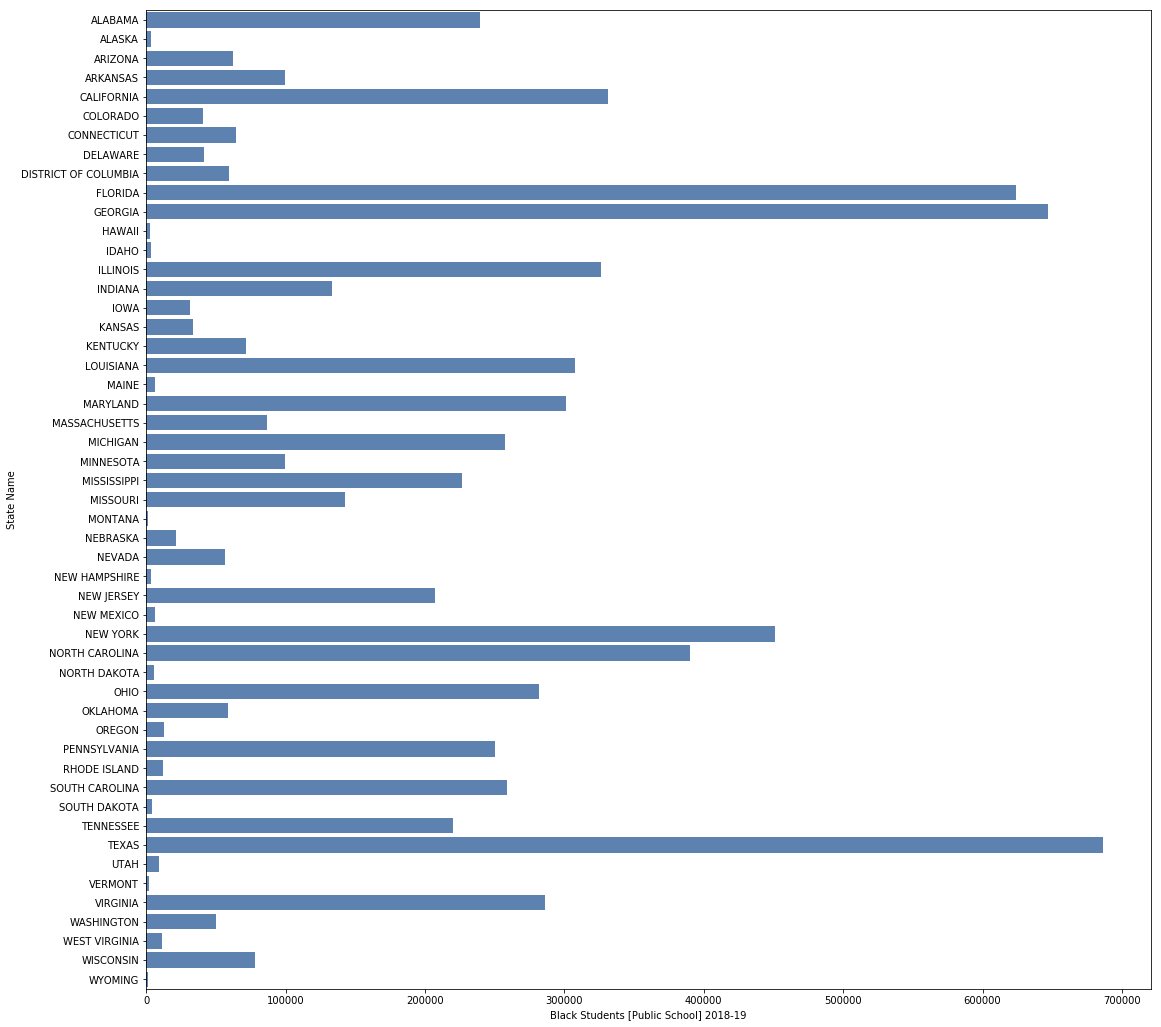

In [46]:
# plot Black public school students by state

plt.figure(figsize=(18, 18))
sns.barplot(x='Black Students [Public School] 2018-19',y='State Name', color='#4f81bd',data=subgroups)

**TAKEAWAY:** The states with the highest number of Black public school students are: Florida, Georgia and Texas.

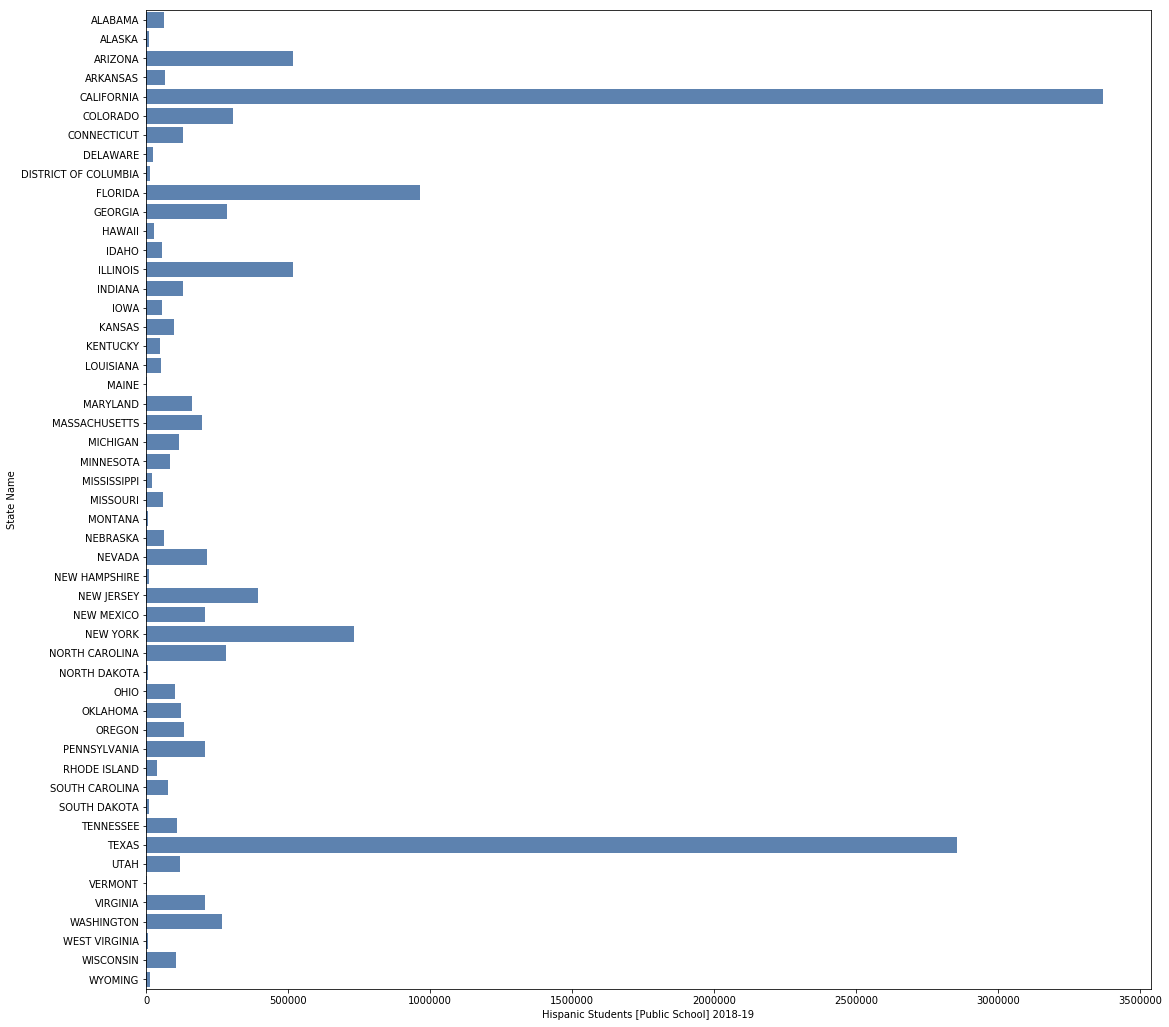

In [47]:
# plot Hispanic public school students by state

plt.figure(figsize=(18, 18))
sns.barplot(x='Hispanic Students [Public School] 2018-19',y='State Name', color='#4f81bd',data=subgroups)

**TAKEAWAY:** The states with the highest number of Hispanic public school students are: California and Texas.

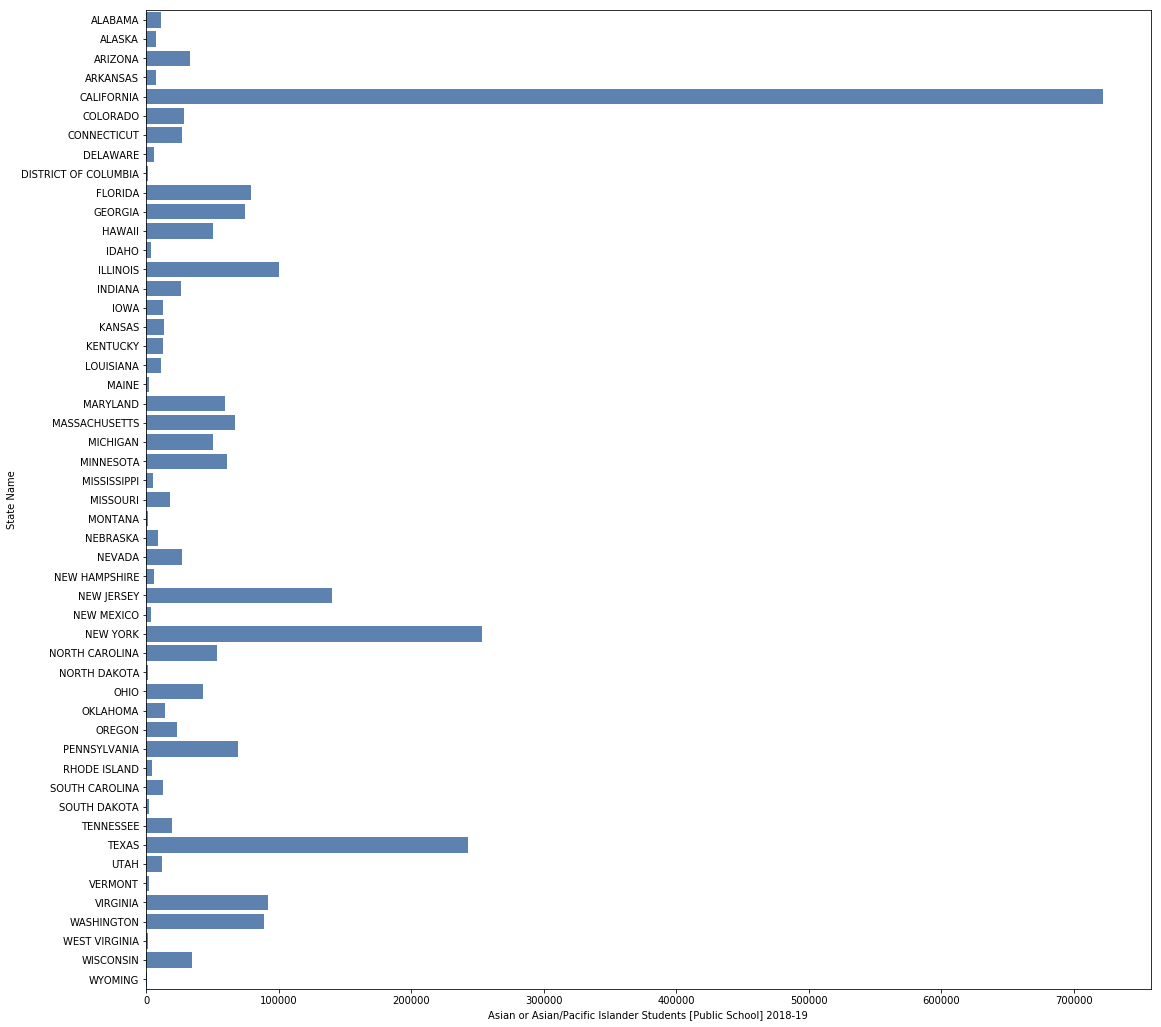

In [48]:
# plot Asian or Pacific Islander public school students by state

plt.figure(figsize=(18, 18))
sns.barplot(x='Asian or Asian/Pacific Islander Students [Public School] 2018-19',y='State Name', color='#4f81bd',data=subgroups)

**TAKEAWAY:** The state with the highest number of Asian or Asian/Pacific Islander public school students is California. New York and Texas are a distant second and third.

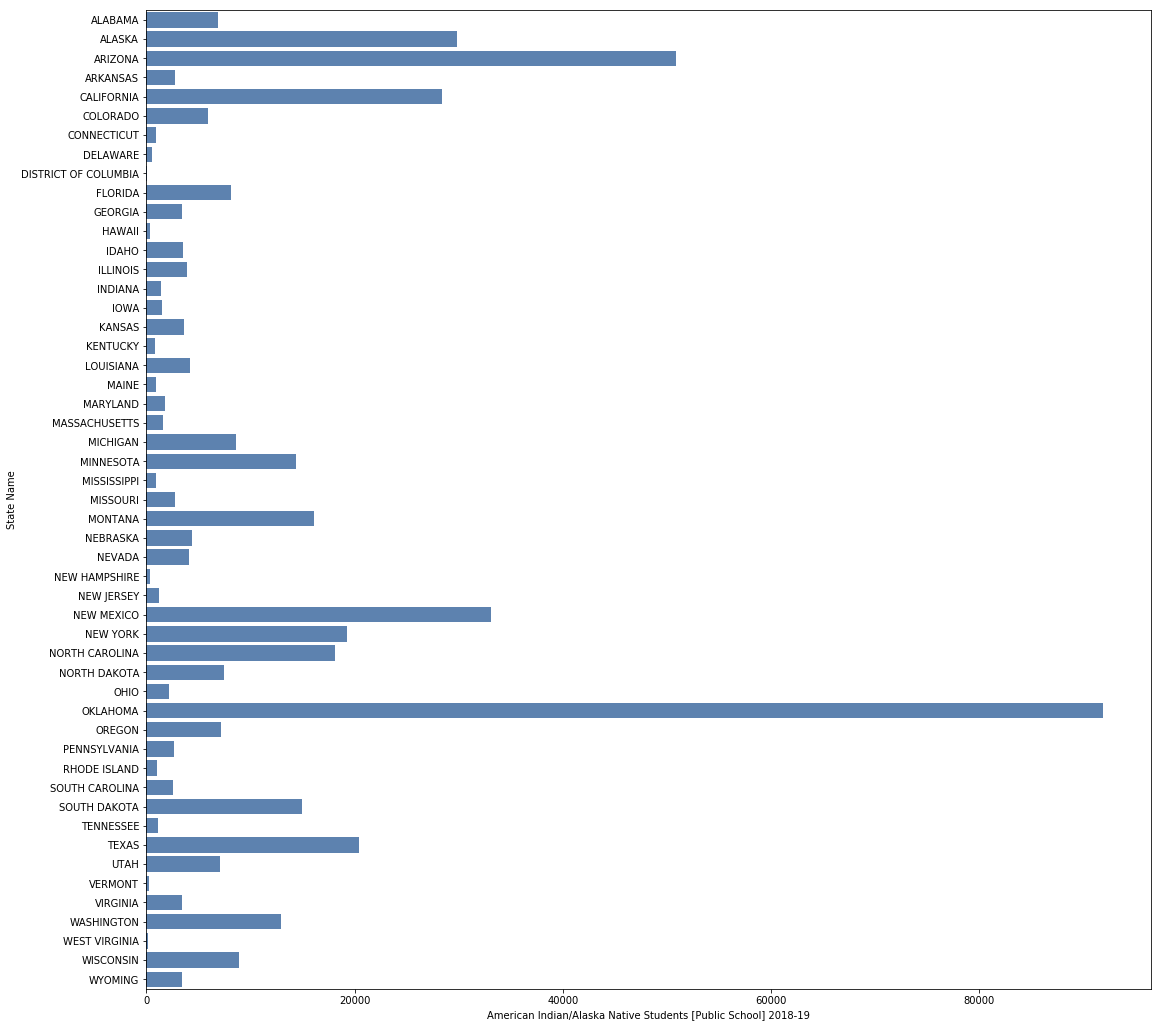

In [49]:
# plot American Indian/Alaska Native public school students by state

plt.figure(figsize=(18, 18))
sns.barplot(x='American Indian/Alaska Native Students [Public School] 2018-19',y='State Name', color='#4f81bd',data=subgroups)

**TAKEAWAY:** The state with the highest number of American Indian/Alaska Native public school students by far is Oklahoma. 

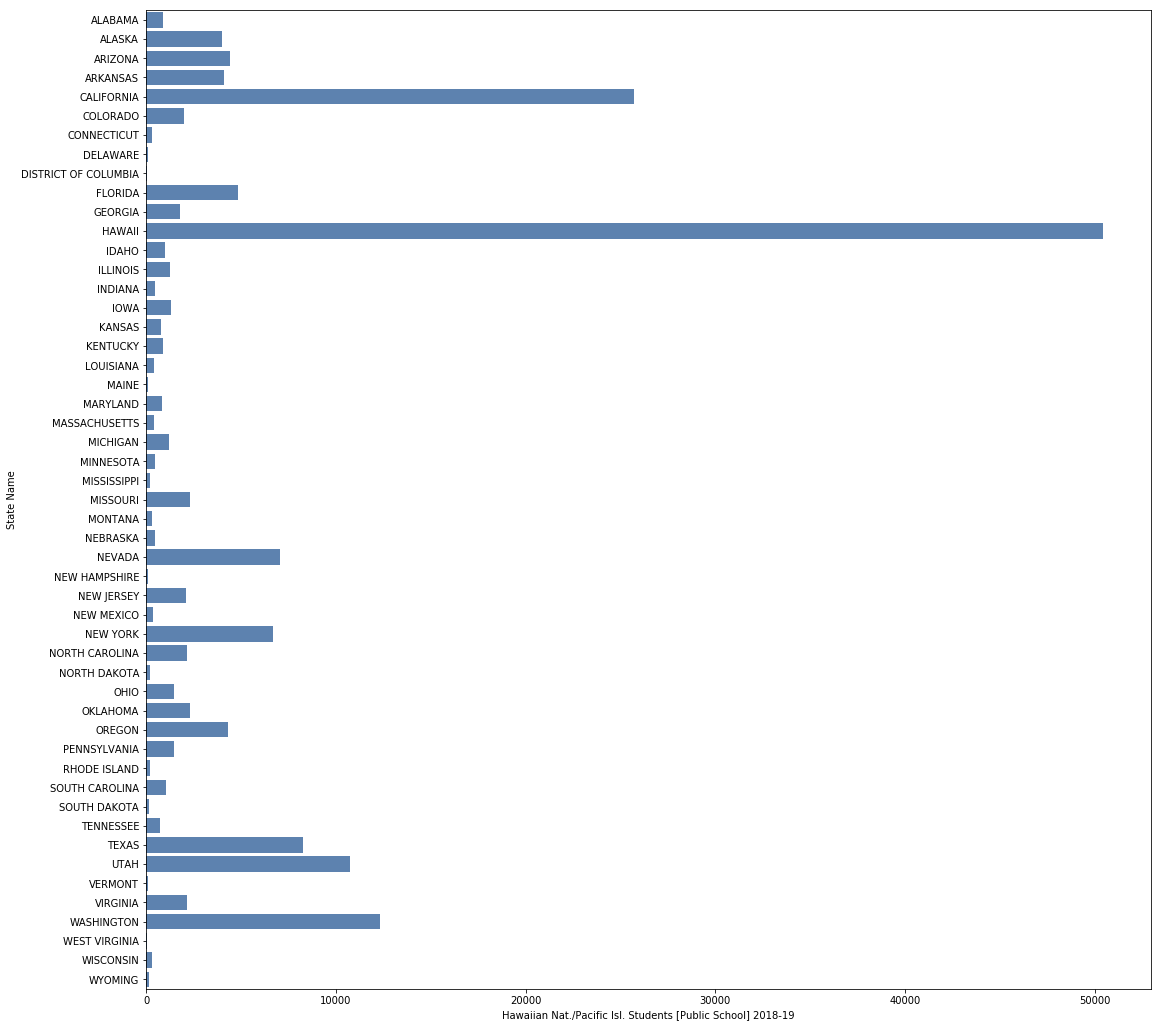

In [50]:
# plot Hawaiian/Pacific Islander public school students by state

plt.figure(figsize=(18, 18))
sns.barplot(x='Hawaiian Nat./Pacific Isl. Students [Public School] 2018-19',y='State Name', color='#4f81bd',data=subgroups)

**TAKEAWAY:** The state with the highest number of Hawaiian/Pacific Islander public school students by far is Hawaii. 

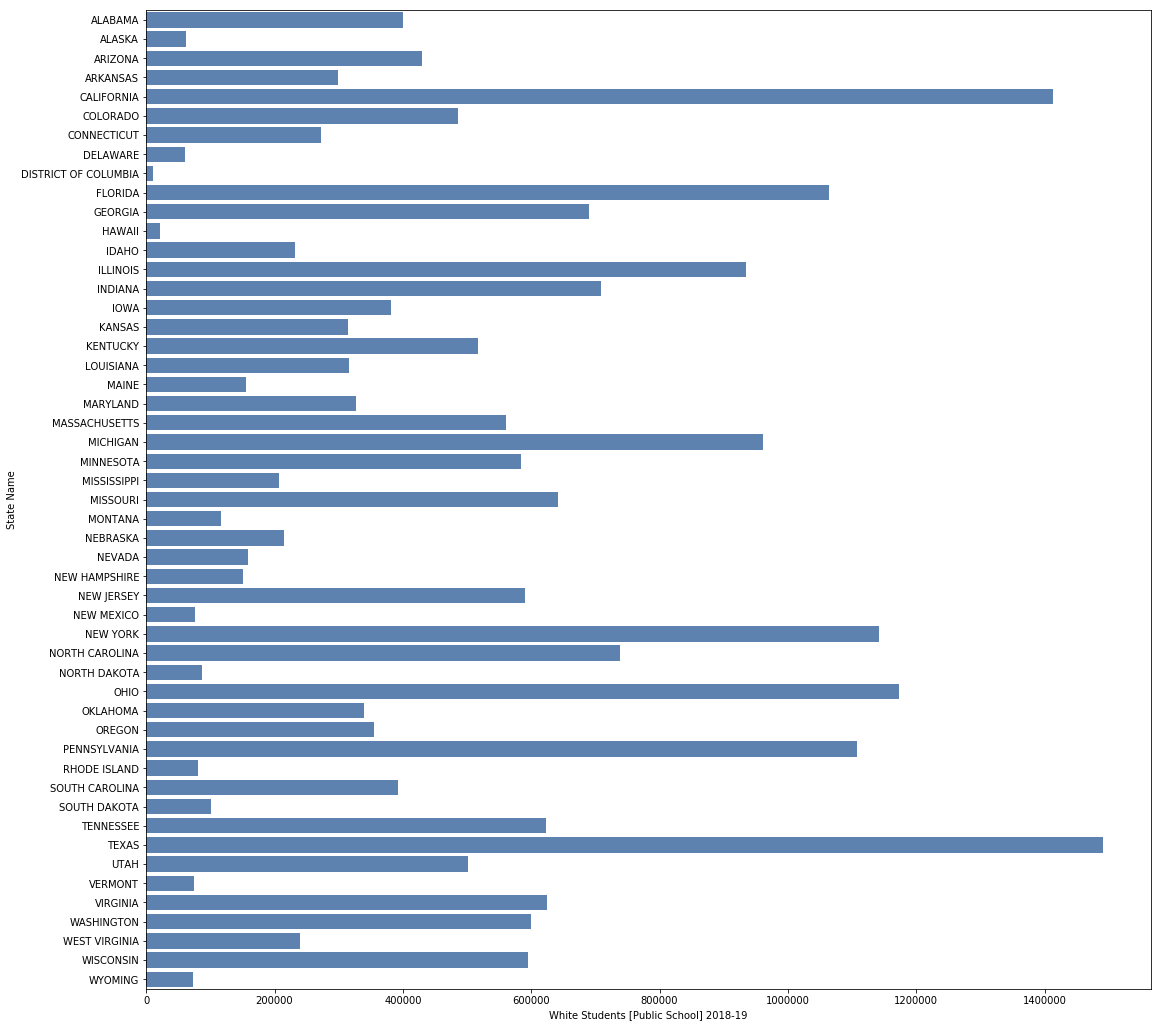

In [51]:
# plot White public school students by state

plt.figure(figsize=(18, 18))
sns.barplot(x='White Students [Public School] 2018-19',y='State Name', color='#4f81bd',data=subgroups)

**TAKEAWAY:** The states with the highest number of White public school students are: California and Texas.

## 5. Key Insights

Populations of White students and populations of White students are mostly in portion with the state's overall population. However, for other demographic groups, students of that ethnicity are more heavily concentrated in just a handful of states.

***

# Next Steps

Possible avenues for further research and analysis:

- calculate each demographic group as a percentage of each state's overall public school population
- compare this data to non-public school enrollments by state
- compares education outcomes (graduation rates) accross states and demographic groups